In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from cv2 import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import os
import img2bw
import mahotas
import mahotas.demos
from pylab import imshow, gray, show
from os import path
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
Stark=tf.keras.models.load_model('Stark.model')
Stark.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                        

In [3]:
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]
characters_dict = dict(zip(np.arange(1,len(characters)+1), characters))

In [4]:
newImage=cv2.imread("alef.jpeg")
gray = cv2.cvtColor(newImage,cv2.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(5,5),0)
blur = cv.medianBlur(blur,7)
thesh =cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 5)
kernel = np.ones((1,1),np.uint8)
dil = cv2.dilate(thesh,kernel,iterations=6)
kernel = np.ones((4,4),np.uint8)
erod = cv2.erode(dil,kernel,iterations=6)
morph =cv2.morphologyEx(erod,cv2.MORPH_CLOSE, kernel)
bitwisess=cv2.bitwise_not(morph)
roto = cv2.rotate(bitwisess, cv2.ROTATE_90_CLOCKWISE)

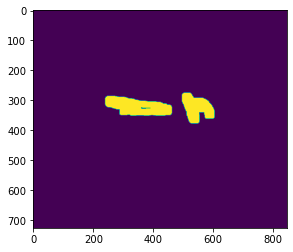

In [5]:
plt.imshow(roto)
plt.show()

In [6]:
newImage1 =cv2.resize(roto,(32,32))

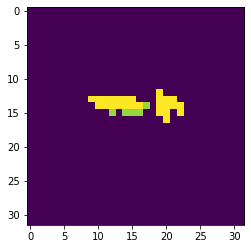

In [7]:
plt.imshow(newImage1)
plt.show()

In [8]:
conv=newImage1.astype(np.float)
tt=conv/255
x=tt.reshape(-1,32,32,1)
x.shape

(1, 32, 32, 1)

In [9]:
predict1=Stark.predict(x)

In [10]:
print(np.argmax(predict1))

0


In [11]:
predict1

array([[9.8202091e-01, 4.1292148e-07, 1.5909572e-16, 5.5684329e-11,
        1.2890341e-07, 9.1856592e-08, 3.1826639e-04, 2.1160183e-12,
        6.6549068e-09, 5.6611906e-09, 8.6423970e-06, 1.9360291e-11,
        4.8213456e-12, 1.5480934e-13, 1.7520071e-12, 2.5411387e-06,
        3.4693343e-04, 5.7010567e-03, 1.1599699e-02, 3.9190341e-14,
        8.6177610e-12, 2.5575980e-10, 7.9571414e-08, 7.6714412e-07,
        6.4123663e-12, 3.1564681e-12, 1.1647011e-10, 5.0833631e-07]],
      dtype=float32)

In [12]:
predict1.shape

(1, 28)

In [13]:
print(characters[np.argmax(predict1)])

ا
